In [1]:
sce = readRDS('./macro.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [2]:
library(Seurat)

Warning message:
“package ‘Seurat’ was built under R version 4.2.3”
Attaching SeuratObject



In [3]:
Idents(sce) = 'seurat_clusters'

In [4]:
c7 = subset(sce,idents = 7)

In [5]:
DefaultAssay(c7) = 'RNA'

In [6]:
options(repr.plot.width = 9,repr.plot.height = 6)

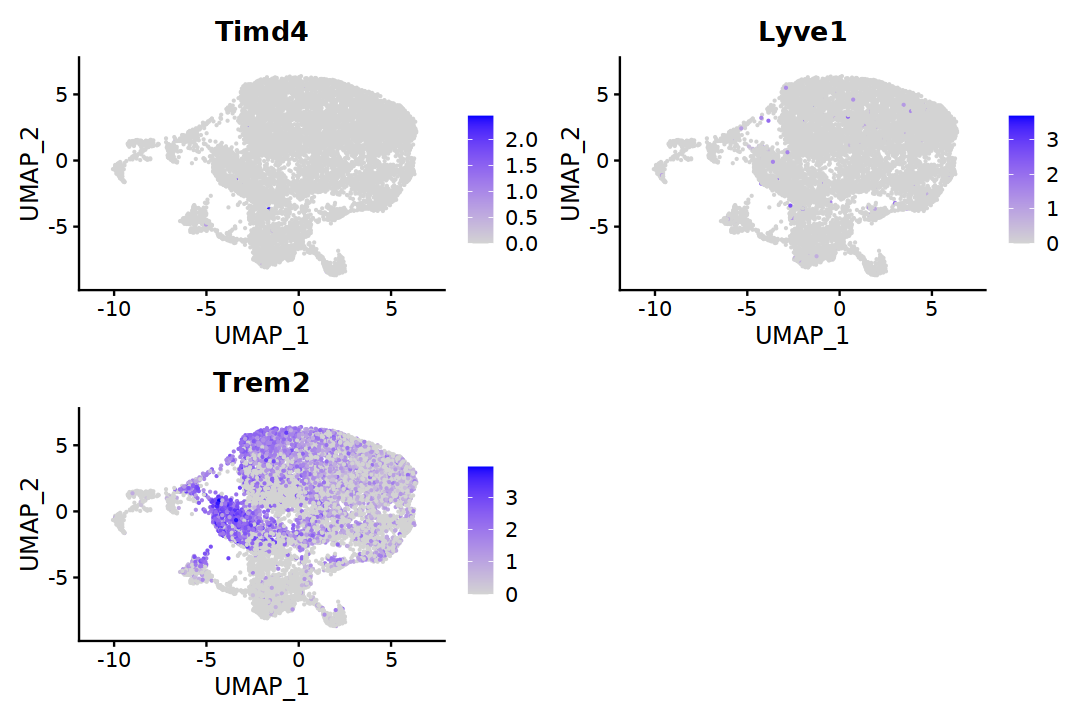

In [7]:
FeaturePlot(sce,features = c('Timd4','Lyve1','Trem2'))

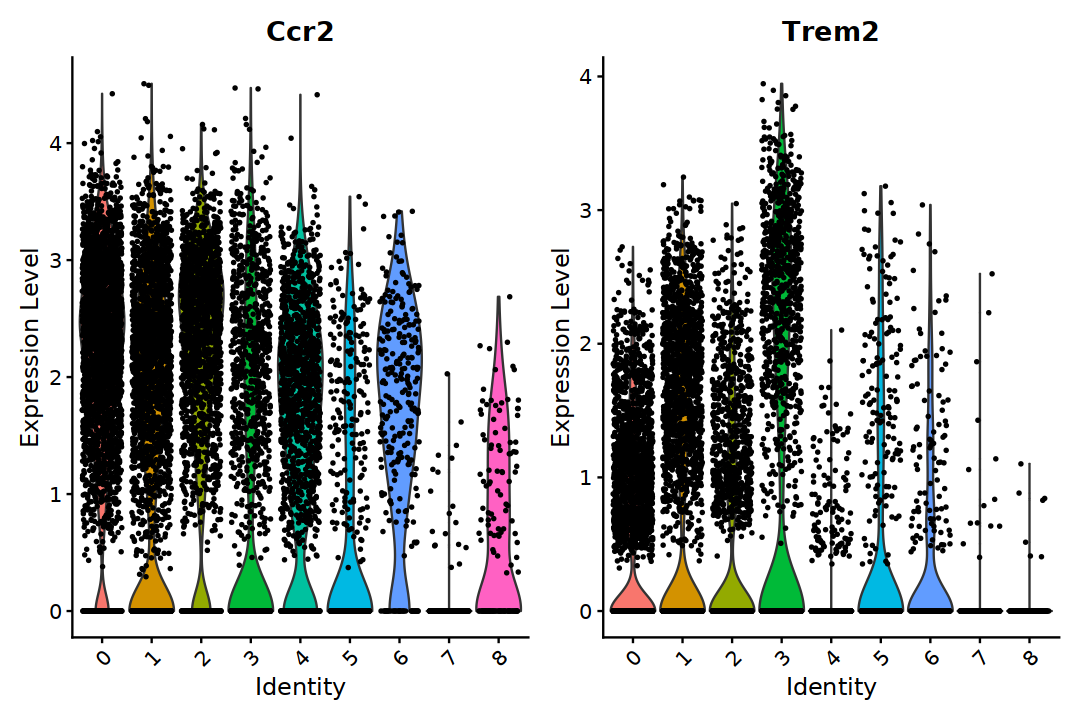

In [8]:
VlnPlot(sce,features = c('Ccr2','Trem2'),group.by = 'seurat_clusters',pt.size = 0.5)

### 讨论不同亚簇的功能

In [9]:
Idents(sce) = 'celltype'

In [10]:
sce.markers <- FindAllMarkers(object = sce, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster mono2

Calculating cluster macro3

Calculating cluster macro4

Calculating cluster macro2

Calculating cluster macro5

Calculating cluster macro1

Calculating cluster macro7

Calculating cluster mono1

Calculating cluster macro6



In [11]:
library('clusterProfiler')



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProf

In [12]:
library(dplyr) 
top50 <- sce.markers %>% group_by(cluster) %>% top_n(50, avg_log2FC)

group <- data.frame(gene=top50$gene,
                    group=top50$cluster)

Gene_ID <- bitr(top50$gene, fromType="SYMBOL", 
            toType="ENTREZID", 
            OrgDb="org.Mm.eg.db")
data  <- merge(Gene_ID,group,by.x='SYMBOL',by.y='gene')
data_GO <- compareCluster(
  ENTREZID~group, 
  data=data, 
  fun="enrichGO", 
  OrgDb="org.Mm.eg.db",
  ont = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff = 0.05,
  qvalueCutoff = 0.05,
  readable = TRUE
)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(top50$gene, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
“5.59% of input gene IDs are fail to map...”


In [13]:
data_GO_sim <- simplify(data_GO, 
                        cutoff=0.05, 
                        by="p.adjust", 
                        select_fun=min)

In [14]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


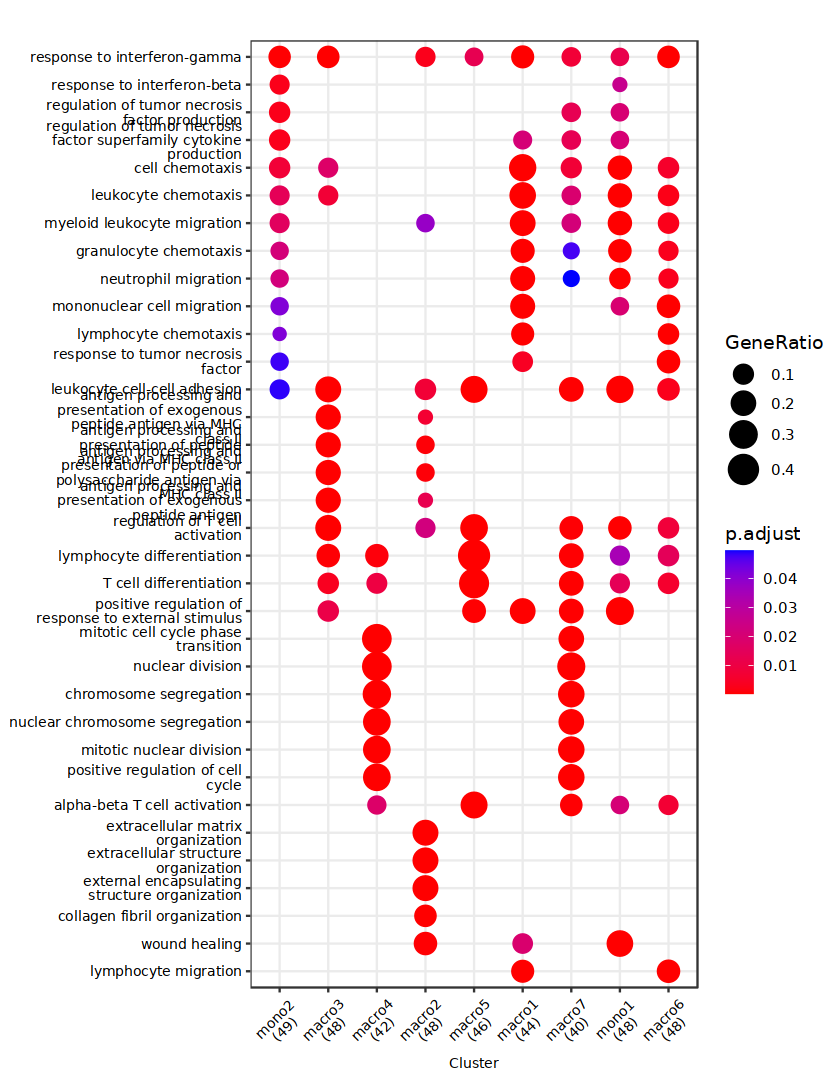

In [16]:
options(repr.plot.height = 9,repr.plot.width = 7)
enrichplot::dotplot(data_GO, showCategory=4,font.size = 8)+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))